A Guide To Simple Linear Regression.
Dataset: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

1-Importing The Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

2-Importing The Dataset

In [17]:
df=pd.read_csv(r'C:\Users\user\Downloads\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


3-Exploring The Dataset

In [18]:
df.info()
#You can see that there are no nan datas here so there's no need for data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [19]:
df.shape

(30, 2)

4-Visualising The Dataset

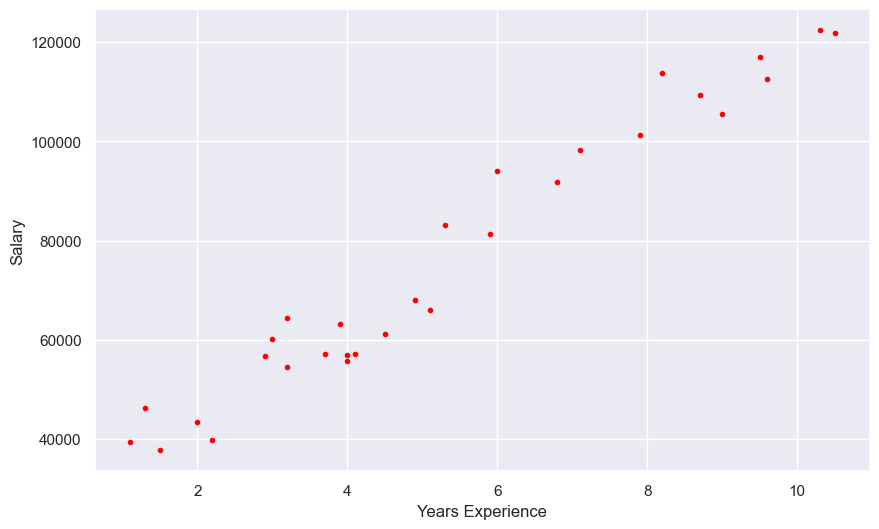

In [20]:
plt.scatter(df.YearsExperience,df.Salary,color='red',marker='.')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

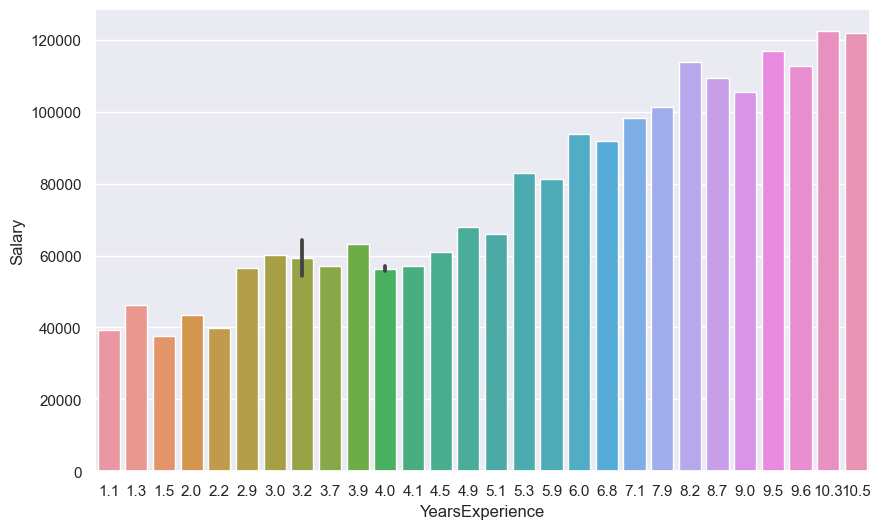

In [21]:
#Adjusting the size so figures and numbers are visible
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='YearsExperience',y='Salary',data=df)

5-Starting To Train The Dataset

In [22]:
#Defining the x and y
x=df['YearsExperience']
y=df['Salary']

In [23]:
#training the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [24]:
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]

C:\Users\user\AppData\Local\Temp\ipykernel_19900\3168945171.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:,np.newaxis]
C:\Users\user\AppData\Local\Temp\ipykernel_19900\3168945171.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=x_test[:,np.newaxis]


In [25]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

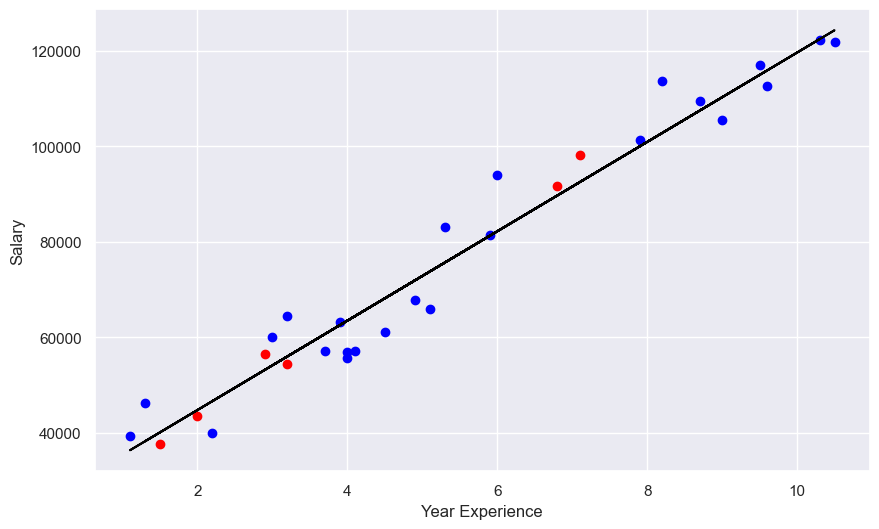

In [26]:
#plot outputs
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regr.predict(x_train),color='black')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.show()

In [27]:
y_pred=regr.predict(x_test)

In [28]:
diff=(y_pred-y_test)
pd.DataFrame(np.c_[y_test, y_pred, diff],columns=["Actual_value", "Predicted_value","Diff"])

,Actual_value,Predicted_value,Diff
0,91738.0,89715.764988,-2022.235012
1,54445.0,56031.058212,1586.058212
2,56642.0,53223.999314,-3418.000686
3,37731.0,40124.391123,2393.391123
4,43525.0,44802.822619,1277.822619
5,98273.0,92522.823887,-5750.176113


6-Evaluation

In [29]:
#the closer the R2-score is to 1 , the better your prediction is
print("R2-score: %.2f" % r2_score(y_test , y_pred))

R2-score: 0.98


In [30]:
print("Train Accuracy:", regr.score(x_train,y_train))
print("Test Accuracy:", regr.score(x_test,y_pred))

Train Accuracy: 0.9494673013344644
Test Accuracy: 1.0
